In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

In [5]:
raw_data = pd.read_csv('Insurance.csv')

In [263]:
df = raw_data.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


/Users/oj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='children', ylabel='Density'>

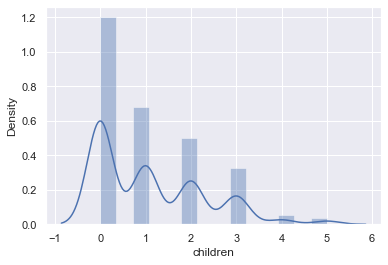

In [77]:
sns.distplot(df['children'])

/Users/oj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

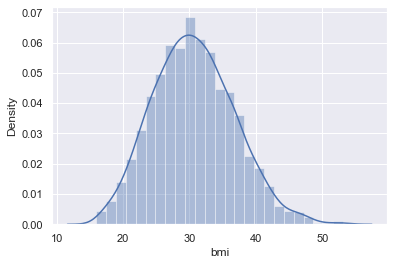

In [78]:
sns.distplot(df['bmi'])

/Users/oj/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

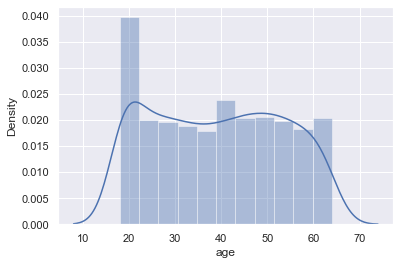

In [79]:
sns.distplot(df['age'])

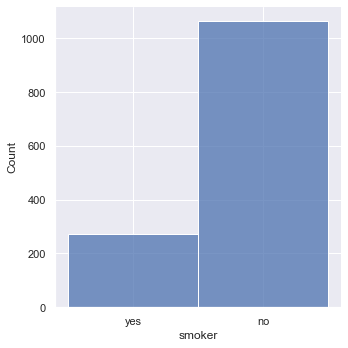

In [80]:
# a lot more non smokers, so this may not be necessary to keep. although in insurance evaluations it is pretty important

sns.displot(df['smoker'])

In [81]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [82]:
raw_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

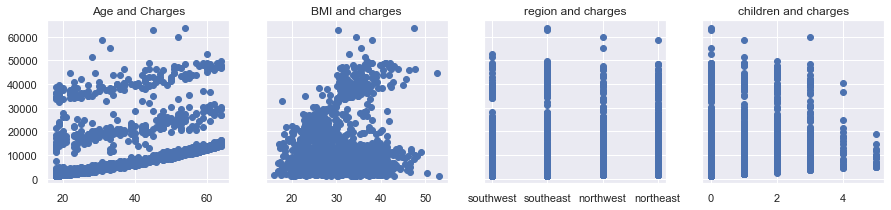

In [83]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) #sharey -> share 'charges' as y
ax1.scatter(df['age'],df['charges'])
ax1.set_title('Age and Charges')
ax2.scatter(df['bmi'],df['charges'])
ax2.set_title('BMI and charges')
ax3.scatter(df['region'],df['charges'])
ax3.set_title('region and charges')
ax4.scatter(df['children'],df['charges'])
ax4.set_title('children and charges')

plt.show()


# Preprocessing

In [84]:
# could probably drop children and region columns but Ill check from feature extraction

In [264]:
# first encode sex and smoker columns

df = df.drop(['children', 'sex'], axis =1 )


In [265]:
df['smoker'] = df['smoker'].map({'yes':1, 'no': 0})

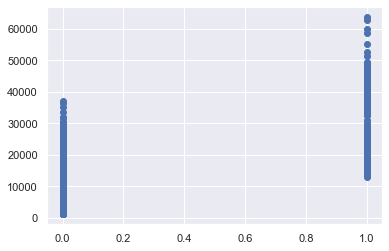

In [348]:
plt.scatter(df['smoker'],df['charges'])

In [123]:
# we may need to split childrne into 3 dummies, 0 children, between 1 & 2 children and 3 or more  children

#df_no_multicollinearity['children'] = df_no_multicollinearity['children'].map({})

In [267]:
df = df.drop(['region'],axis=1)

In [268]:
df

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [161]:
# scale age and bmi

from sklearn.preprocessing import StandardScaler

In [274]:
col_to_scale = df.iloc[:,:2]
targets = df_arranged['charges']

In [275]:
scaler = StandardScaler()

In [276]:
scaler.fit(col_to_scale)
scaled_col = scaler.transform(col_to_scale)

In [349]:
df[['age','bmi']] = scaled_col
scaled_df = df.drop(['charges'], axis=1)

In [350]:
targets_reshaped = targets.values.reshape(-1,1)

In [351]:
scaler.fit(targets_reshaped)
scaled_targets = scaler.transform(targets_reshaped)

In [352]:
scaled_targets

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

In [353]:
scaled_df

,age,bmi,smoker
0,-1.438764,-0.453320,1
1,-1.509965,0.509621,0
2,-0.797954,0.383307,0
3,-0.441948,-1.305531,0
4,-0.513149,-0.292556,0
...,...,...,...
1333,0.768473,0.050297,0
1334,-1.509965,0.206139,0
1335,-1.509965,1.014878,0
1336,-1.296362,-0.797813,0


# Train Test Split

In [354]:
from sklearn.model_selection import train_test_split 

In [355]:
x_train,x_test, y_train, y_test = train_test_split(scaled_df,scaled_targets, test_size = 0.2, random_state=300)

In [356]:
print(x_train.shape, y_train.shape)

(1070, 3) (1070, 1)


In [357]:
print(x_test.shape, y_test.shape)

(268, 3) (268, 1)


# Create Regression Model

In [358]:
reg = LinearRegression()

In [359]:
reg.fit(x_train,y_train)

LinearRegression()

In [360]:
yhat = reg.predict(x_train)

Text(0, 0.5, 'Predictions (y_hat)')

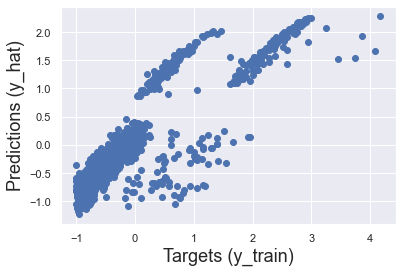

In [361]:
plt.scatter(y_train,yhat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

In [362]:
reg.score(x_train,y_train)

0.7444564099835435

In [338]:
reg.intercept_

array([-0.40963149])

In [339]:
reg.coef_

array([[0.33211094, 1.95738227]])

In [340]:
from sklearn.feature_selection import f_regression

In [341]:
p_values = f_regression(x_train,y_train)[1]

/Users/oj/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [342]:
p_values

array([3.85141241e-025, 3.63639700e-220])

In [343]:
p_values.round(3)

array([0., 0.])

In [344]:
x_train.columns.values

array(['age', 'smoker'], dtype=object)

In [345]:
reg_summary = pd.DataFrame(data = x_train.columns.values, columns=['Features'])
reg_summary['Coefficients'] = reg.coef_.reshape(-1,1)

In [321]:
reg_summary['p values'] = p_values.round(3)

In [322]:
reg_summary

,Features,Coefficients,p values
0,age,0.315027,0.0
1,bmi,0.144076,0.0
2,smoker,1.955778,0.0


In [363]:
reg.score(x_test,y_test)

0.7545241537213262